In [ ]:
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split , cross_val_score
import re
import seaborn
import numpy as np 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,  plot_roc_curve , classification_report , accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
my_data =  pd.read_csv("spam_or_not_spam.csv")

In [ ]:
my_data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
my_data.dropna(inplace =  True)
# removing the empty or not a number values

In [ ]:
my_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
X =  my_data.iloc[:,0].values
y = my_data.iloc[:,-1].values

In [ ]:
nltk.download('stopwords')
corpus =[]
for i in range(len(X)):
    stemmer = PorterStemmer()
    X[i] = X[i].lower()
    X[i] = X[i].split()
    email =  [stemmer.stem(J) for J in X[i] ]
    email = ' '.join(email)
    corpus.append(email)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
v = CountVectorizer()
X = v.fit_transform(corpus).toarray()
# converting the tokens here

In [ ]:
# splitting the data
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2 , random_state = 42 )

In [ ]:
svc  =  SVC()
score_1 = cross_val_score(svc,X_train,y_train,cv = 10 )
score_1 

array([0.90416667, 0.94583333, 0.94166667, 0.95      , 0.94583333,
       0.95416667, 0.9375    , 0.94166667, 0.93333333, 0.94979079])

In [ ]:
score_1.mean()

0.9403957461645748

In [ ]:
# RandomForestClassifier
Random  =  RandomForestClassifier(n_estimators= 120)
score_2 = cross_val_score(Random,X_train,y_train,cv = 10 )
score_2 

array([0.95416667, 0.975     , 0.97916667, 0.99166667, 0.97916667,
       0.97083333, 0.98333333, 0.97916667, 0.975     , 0.9790795 ])

In [ ]:
score_2.mean()

0.976657949790795

In [ ]:
# RandomForestClassifier for score 2
Decision  =  DecisionTreeClassifier()
score_3 = cross_val_score(Decision,X_train,y_train,cv = 10 )
score_3

array([0.95      , 0.95833333, 0.95      , 0.97916667, 0.96666667,
       0.94583333, 0.975     , 0.95      , 0.95833333, 0.9748954 ])

In [ ]:
score_3.mean()

0.9608228730822873

In [ ]:
# KNN
knn = KNeighborsClassifier()

score_4 = cross_val_score(knn,X_train,y_train,cv = 10 )
score_4

array([0.89583333, 0.89583333, 0.9375    , 0.93333333, 0.92083333,
       0.9375    , 0.92083333, 0.94166667, 0.92916667, 0.88284519])

In [ ]:
score_4.mean()

0.9195345188284518

In [ ]:
Random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [ ]:
y_pred =  Random.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.985


In [ ]:
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       500
           1       0.99      0.92      0.95       100

    accuracy                           0.98       600
   macro avg       0.99      0.96      0.97       600
weighted avg       0.99      0.98      0.98       600



[[499   1]
 [  8  92]]


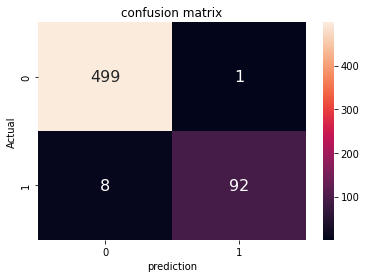

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


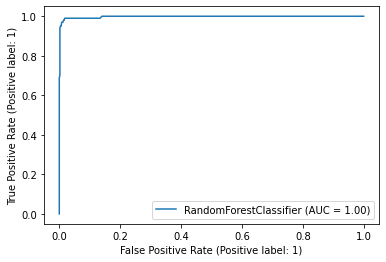

In [ ]:
# graph plotting using seaborn Roc curve
plot_roc_curve(Random,X_test,y_test)
plt.show()